<a href="https://colab.research.google.com/github/run-llama/llama_index/blob/main/docs/docs/examples/multi_modal/multi_modal_retrieval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Modal Retrieval using GPT text embedding and CLIP image embedding for Wikipedia Articles

In this notebook, we show how to build a Multi-Modal retrieval system using LlamaIndex.

Wikipedia Text embedding index: Generate GPT text embeddings from OpenAI for texts

Wikipedia Images embedding index: [CLIP](https://github.com/openai/CLIP) embeddings from OpenAI for images


Query encoder:
* Encoder query text for text index using GPT embedding
* Encoder query text for image index using CLIP embedding

Framework: [LlamaIndex](https://github.com/run-llama/llama_index)

Steps:
1. Download texts and images raw files for Wikipedia articles
2. Build text index for vector store using GPT embeddings
3. Build image index for vector store using CLIP embeddings
4. Retrieve relevant text and image simultaneously using different query encoding embeddings and vector stores

In [4]:
%pip install llama_index ftfy regex tqdm
%pip install git+https://github.com/openai/CLIP.git

  Using cached llama_index_core-0.10.68.post1-py3-none-any.whl.metadata (2.5 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
Using cached llama_index_core-0.10.68.post1-py3-none-any.whl (1.6 MB)
Using cached typing_extensions-4.12.2-py3-none-any.whl (37 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.9.0
    Uninstalling typing_extensions-4.9.0:
      Successfully uninstalled typing_extensions-4.9.0
  Attempting uninstall: llama-index-core
    Found existing installation: llama-index-core 0.11.0
    Uninstalling llama-index-core-0.11.0:
      Successfully uninstalled llama-index-core-0.11.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
selenium 4.23.0 requires typing_extensions~=4.9.0, but you have typing-extensions 4.12.2 which is incompatible.
llama-index-vector-stores-qdrant 

In [ ]:
## extract the dataset from the magic-pdf folder

# import os
# import shutil
# from pathlib import Path

# # Define the path for the magic-pdf folder
# magic_pdf_path = Path("BookData/magic-pdf")

# # Create the directory where documents will be stored
# data_path = Path("documents")
# data_path.mkdir(parents=True, exist_ok=True)

# # Iterate through each section (subfolder) in magic-pdf
# for section in magic_pdf_path.iterdir():
#     if section.is_dir():  # Ensure we're only processing directories
#         section_path = section / "auto"
        
#         # Process the markdown files
#         markdown_files = section_path.glob("*.md")
#         for markdown_file in markdown_files:
#             text = markdown_file.read_text()
            
#             # Write the text content into a .txt file
#             with open(data_path / f"{section.name}.txt", "w") as fp:
#                 fp.write(text)

#         # Copy images from the section's images folder to the documents directory
#         images_path = section_path / "images"
#         if images_path.exists() and images_path.is_dir():
#             for image_file in images_path.glob("*"):
#                 shutil.copy(image_file, data_path)


## Load and Download Multi-Modal datasets including texts and images from Wikipedia
Parse wikipedia articles and save into local folder

## Build Multi Modal Vector Store using Text and Image embeddings under different collections

In [ ]:
# import nltk
# nltk.download('punkt')
# print(nltk.data.path)

In [1]:
## First time run

import os
from dotenv import load_dotenv
import openai

# Load the environment variables from the specified .env file
dotenv_path = '/home/zihan/Desktop/Manufacturing_QA/Experimental_Code/GraphRag/.env'
load_dotenv(dotenv_path)

# Load the OpenAI API key from the environment variable
api_key = os.getenv('GRAPHRAG_API_KEY')
assert api_key is not None, "OpenAI API key not found in environment variables."

openai.api_key = api_key


import qdrant_client
from llama_index.core import SimpleDirectoryReader
from llama_index.vector_stores.qdrant import QdrantVectorStore
from llama_index.core import VectorStoreIndex, StorageContext
from llama_index.core.indices import MultiModalVectorStoreIndex

# Create a local Qdrant vector store
client = qdrant_client.QdrantClient(path="qdrant_d_0")

text_store = QdrantVectorStore(
    client=client, collection_name="text_collection_0"
)
image_store = QdrantVectorStore(
    client=client, collection_name="image_collection_0"
)
storage_context = StorageContext.from_defaults(
    vector_store=text_store, image_store=image_store
)

# Create the MultiModal index
documents = SimpleDirectoryReader("/home/zihan/Desktop/Manufacturing_QA/BookData/FullBook_HighQuality").load_data()
index = MultiModalVectorStoreIndex.from_documents(
    documents,
    storage_context=storage_context,
)


# Save it
index.storage_context.persist(persist_dir="./storage")


In [1]:
import os
os.chdir("../../")
!pwd

/Users/zihan/Desktop/Manufacturing_QA


In [2]:

import openai
api_key = os.getenv('OPENAI_API_KEY')
assert api_key is not None, "OpenAI API key not found in environment variables."

openai.api_key = api_key

import qdrant_client
from llama_index.vector_stores.qdrant import QdrantVectorStore
from llama_index.core import StorageContext

# Create a local Qdrant vector store
client = qdrant_client.QdrantClient(path="3Experiment/3storage/MMqdrant_d")

text_store = QdrantVectorStore(
    client=client, collection_name="text_collection"
)
image_store = QdrantVectorStore(
    client=client, collection_name="image_collection"
)
storage_context = StorageContext.from_defaults(
    vector_store=text_store, image_store=image_store, persist_dir="3Experiment/3storage/MMstorage"
)

from llama_index.core import load_index_from_storage
index = load_index_from_storage(storage_context, image_store=image_store)

if: 
AttributeError: 'OpenAIEmbedding' object has no attribute '__pydantic_private__'
do: 
pip install --upgrade llama_index qdrant_client pydantic


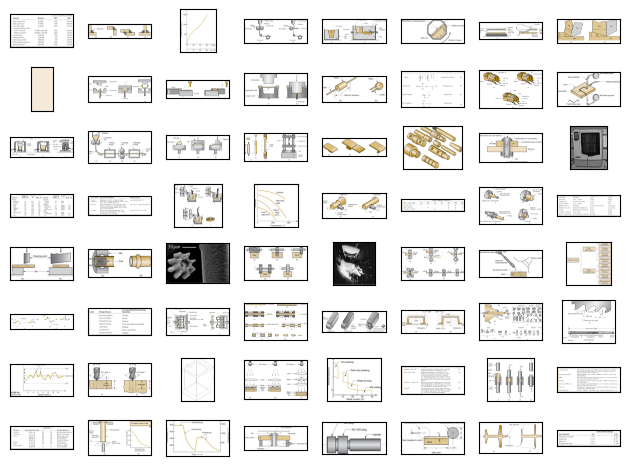

In [3]:
%matplotlib inline
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import os

# Define the path for the documents folder
magic_pdf_path = Path("1Book/3Book_txt_images")
image_paths = list(magic_pdf_path.glob("*.jpg"))

# Function to plot images
def plot_images(image_paths):
    images_shown = 0
    for img_path in image_paths:
        if os.path.isfile(img_path):
            image = Image.open(img_path).convert("RGB")
            
            plt.subplot(8, 8, images_shown + 1)
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])
            
            images_shown += 1
            if images_shown >= 64:
                break

    plt.tight_layout()
    plt.show()

# Call the function with the image paths
plot_images(image_paths)


### Build a separate CLIP image embedding index under a differnt collection `wikipedia_img`

## Get Multi-Modal retrieval results for some example queries

In [16]:
test_query = "In brazing, the base metals melt at temperatures above 840F (450C) while in soldering they melt at 840F (450C) or below: (a) true, or (b) false."
test_query = "In brazing, do the base metals melt at temperatures above 840°F (450°C), while in soldering they melt at or below 840°F (450°C)? (a) True or (b) False."

test_query = "The basic structural unit of matter is which one of the following? (a) atom, (b) electron, (c) element, (d) molecule, or (e) nucleus."
test_query = "The basic structural unit of matter is the atom. (a) atom, (b) electron, (c) element, (d) molecule, or (e) nucleus."

test_query = "Which figure shows the components involved in a welding process, including the consumable electrode and the protective gas?"
test_query = "The figure that shows the components involved in a welding process, including the consumable electrode and the protective gas, is displayed."
# generate  retrieval results
retriever = index.as_retriever(similarity_top_k=3, image_similarity_top_k=3)
retrieval_results = retriever.retrieve(test_query)
retrieval_results

[NodeWithScore(node=TextNode(id_='913e45e2-2770-488b-9dae-f6677c56d453', embedding=None, metadata={'file_path': '/Users/zihan/Desktop/Manufacturing_QA/1Book/3Book_txt_images/sec29.txt', 'file_name': 'sec29.txt', 'file_type': 'text/plain', 'file_size': 100966, 'creation_date': '2024-10-11', 'last_modified_date': '2024-10-11'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='5a57d62c-7171-489f-9026-1e4efab22e3a', node_type=<ObjectType.DOCUMENT: '4'>, metadata={'file_path': '/Users/zihan/Desktop/Manufacturing_QA/1Book/3Book_txt_images/sec29.txt', 'file_name': 'sec29.txt', 'file_type': 'text/plain', 'file_size': 100966, 'creation_date': '2024-10-11', 'last_modified_date': '2024-10-11'}, hash='529e7dd36b4fbf22fe

In [6]:
# 1
scores = [result.score for result in retrieval_results]
scores

[0.8564519803297188,
 0.8507482665832029,
 0.8456062517614824,
 0.32707487407869046,
 0.32169730063452673,
 0.3182827741719402]

In [8]:
# 2
scores = [result.score for result in retrieval_results]
scores

[0.8402739141800866,
 0.8365268695000523,
 0.8303188869320948,
 0.33089621461848784,
 0.33063276656636453,
 0.3185691531579137]

In [11]:
# 3
scores = [result.score for result in retrieval_results]
scores

[0.8105909308852949,
 0.797525429238259,
 0.791600564865136,
 0.3035165674225309,
 0.2869663902203852,
 0.2855530842133871]

In [13]:
# 4
scores = [result.score for result in retrieval_results]
scores

[0.8281198093567884,
 0.8101155605569236,
 0.8051544616873529,
 0.3203240365889524,
 0.3082348944465033,
 0.3019084248061282]

In [15]:
# 5
scores = [result.score for result in retrieval_results]
scores

[0.8655221214933186,
 0.8585709147250444,
 0.8570857590039358,
 0.3448654283631655,
 0.3355650414573148,
 0.33545101850016523]

In [17]:
# 6
scores = [result.score for result in retrieval_results]
scores

[0.8670217821421031,
 0.8549547423775858,
 0.8535312621087267,
 0.35126465889301417,
 0.3506907864914456,
 0.3495651799787336]

**Node ID:** 52d1c311-b148-4e75-9f9e-f4d855fb33bf<br>**Similarity:** 0.8611861639569359<br>**Text:** # Brazing, Soldering,  Brazing, Soldering,  and Adhesive  and Adhesive  Bonding Bonding  

# 30 30  

This chapter covers three joining processes that are  similar to welding in certain respects: brazing, soldering,  and adhesive bonding. Brazing and soldering both use  ﬁ  ller metals to join and bond two (or more) metal parts  to provide a permanent joint. It is difﬁ  cult, although not  impossible, to disassemble the parts after a brazed or  soldered joint has been made. In the spectrum of join- ing processes, brazing and soldering lie between fusion  welding and solid-state welding. A ﬁ  ller metal is added  in brazing and soldering as in most fusion-welding  operations; however, no melting of the base metals  occurs, which is similar to solid-state welding. Despite  these anomalies, brazing and soldering are generally  considered to be distinct from welding. Brazing and  soldering are attractive compared to welding under cir- cumstances where (1) the metals have poor weldability,  (2) dissimilar metals are to be joined, (3) the intense  heat of welding may damage the components being  joined, (4) the geometry of the joint does not lend itself  to any of the welding methods, and/or (5) high strength  is not a requirement.  

# Chapter Contents  

# 30.1 Brazing  

30.1.1 Brazed Joints

 30.1.2 Filler Metals and Fluxes

 30.1.3 Brazing Methods  

# 30.2 Soldering  

30.2.1 Joint Designs in Soldering

 30.2.2 Solders and Fluxes

 30.2.3 Soldering Methods  

# 30.3 Adhesive Bonding  

30.3.1 Joint Design

 30.3.2 Adhesive Types

 30.3.3   Adhesive Application  Technology Adhesive bonding shares certain features in com- mon with brazing and soldering. It utilizes the forces  of attachment between a ﬁ  ller material and two closely  spaced surfaces to bond the parts. The differences are  that the ﬁ  ller material in adhesive bonding is not metal- lic, and the joining process is carried out at room tem- perature or only modestly above.  

#  Brazing  

Brazing is a joining process in which a ﬁ  ller metal is  melted and distributed by capillary action between  the faying surfaces of the metal parts being joined. No  melting of the base metals occurs in brazing; only the  ﬁ  ller melts. In brazing the ﬁ  ller metal (also called the  brazing metal ), has a melting temperature (liquidus) that is above  $450^{\circ}\mathrm{C}$ $(840^{\circ}\mathrm{F})$   but below the melting point (solidus) of the base metal(s) to be joined. If the joint  is properly designed and the brazing operation has been properly performed, the  brazed joint will be stronger than the ﬁ  ller metal out of which it has been formed  upon solidiﬁ  cation. This rather remarkable result is due to the small part clearances  used in brazing, the metallurgical bonding that occurs between base and ﬁ  ller met- als, and the geometric constrictions that are imposed on the joint by the base parts.  

Brazing has several advantages compared to welding: (1) any metals can be  joined, including dissimilar metals; (2) certain brazing methods can be performed  quickly and consistently, thus permitting high cycle rates and automated production;  (3) some methods allow multiple joints to be brazed simultaneously; (4) brazing can  be applied to join thin-walled parts that cannot be welded; (5) in general, less heat  and power are required than in fusion welding; (6) problems with the heat-affected  zone in the base metal near the joint are reduced; and (7) joint areas that are inac- cessible by many welding processes can be brazed, since capillary action draws the  molten ﬁ  ller metal into the joint.<br>

----------------------------------------


**Node ID:** 3d57b940-c08b-40ca-846f-dba873f9e3f3<br>**Similarity:** 0.8494122063180414<br>**Text:** An overlap of at least three times the thickness of  the thinner part is generally considered good design practice. Some adaptations of  the lap joint for brazing are illustrated in Figure 30.2. An advantage of brazing over  welding in lap joints is that the ﬁ  ller metal is bonded to the base parts throughout  the entire interface area between the parts, rather than only at the edges (as in ﬁ  llet  welds made by arc welding) or at discrete spots (as in resistance spot welding).  

Clearance between mating surfaces of the base parts is important in brazing. The  clearance must be large enough so as not to restrict molten ﬁ  ller metal from ﬂ  owing  throughout the entire interface. Yet if the joint clearance is too great, capillary action  will be reduced and there will be areas between the parts where no ﬁ  ller metal is  present. Joint strength is affected by clearance, as depicted in Figure 30.3. There is an  

![](images/ee3c550f55bdc7e3f663c2ad69b05a85fa9953e5bc03e07e80d11559aa70cc2f.jpg)  
FIGURE 30.3  Joint strength  as a function of joint clearance.  

optimum clearance value at which joint strength is maximized. The issue is compli- cated by the fact that the optimum depends on base and ﬁ  ller metals, joint conﬁ  gu- ration, and processing conditions. Typical brazing clearances in practice are 0.025 to  $0.25~\mathrm{mm}$  (0.001–0.010 in). These values represent the joint clearance at the brazing  temperature, which may be different from room temperature clearance, depending  on thermal expansion of the base metal(s).  

Cleanliness of the joint surfaces prior to brazing is also important. Surfaces  must be free of oxides, oils, and other contaminants in order to promote wetting  and capillary attraction during the process, as well as bonding across the entire  interface. Chemical treatments such as solvent cleaning (Section 28.1.1) and  mechanical treatments such as wire brushing and sand blasting (Section 28.1.2)  are used to clean the surfaces. After cleaning and during the brazing operation,  ﬂ  uxes are used to maintain surface cleanliness and promote wetting for capillary  action in the clearance between faying surfaces.  

# 30.1.2  FILLER METALS AND FLUXES  

Common ﬁ  ller metals used in brazing are listed in Table 30.1 along with the principal  base metals on which they are typically used. To qualify as a brazing metal, the fol- lowing characteristics are needed: (1) melting temperature must be compatible with  the base metal, (2) surface tension in the liquid phase must be low for good wettabil- ity, (3) ﬂ  uidity of the molten metal must be high for penetration into the interface,  (4) the metal must be capable of being brazed into a joint of adequate strength for  the application, and (5) chemical and physical interactions with base metal (e.g., gal- vanic reaction) must be avoided. Filler metals are applied to the brazing operation in  various ways, including wire, rod, sheets and strips, powders, pastes, preformed parts  made of braze metal designed to ﬁ  t a particular joint conﬁ  guration, and cladding  on one of the surfaces to be brazed. Several of these techniques are illustrated in  Figures 30.4 and 30.5. Braze metal pastes, shown in Figure 30.5, consist of ﬁ  ller metal  powders mixed with ﬂ  uid ﬂ  uxes and binders.  

Brazing ﬂ  uxes serve a similar purpose as in welding; they dissolve, combine with,  and otherwise inhibit the formation of oxides and other unwanted byproducts in the  

TABLE  •  30.1  Common ﬁ  ller metals used in brazing and the base metals on which they are used. 
![](images/f1a7f3a40f273dbbc01e46cae3c1c4bff395ad894a893d25bb8ab31fc688ba36.jpg)  

!<br>

----------------------------------------


**Node ID:** a371c575-5f13-4a32-90f4-aef4f6e46b5c<br>**Similarity:** 0.8490792536257069<br>**Text:** Braze Welding   This process differs from the other brazing processes in the type  of joint to which it is applied. As pictured in Figure 30.6, braze welding is used for  ﬁ  lling a more conventional weld joint, such as the V-joint shown. A greater quantity  of ﬁ  ller metal is deposited than in brazing, and no capillary action occurs. In braze  welding, the joint consists entirely of ﬁ  ller metal; the base metal does not melt and  is therefore not fused into the joint as in a conventional fusion welding process. The  principal application of braze welding is repair work.  

![](images/29056bfa045a19893c48ed239d9e277a4ea57c3cb0c85031688d8679b234e858.jpg)  
FIGURE 30.6  Braze welding. The joint consists  of braze (ﬁ  ller) metal; no base metal is fused in  the joint.  

#  Soldering  

Soldering is similar to brazing and can be deﬁ  ned as a joining process in which a ﬁ  ller  metal with melting point (liquidus) not exceeding $450^{\circ}\mathrm{C}$   $(840^{\circ}\mathrm{F})$  is melted and distrib- uted by capillary action between the faying surfaces of the metal parts being joined. As  in brazing, no melting of the base metals occurs, but the ﬁ  ller metal wets and combines  with the base metal to form a metallurgical bond. Details of soldering are similar to  those of brazing, and many of the heating methods are the same. Surfaces to be sol- dered must be precleaned so they are free of oxides, oils, and so on. An appropriate ﬂ  ux  must be applied to the faying surfaces, and the surfaces are heated. Filler metal, called  solder , is added to the joint, which distributes itself between the closely ﬁ  tting parts.  

In some applications, the solder is precoated onto one or both of the surfaces—a  process called  tinning , irrespective of whether the solder contains any tin. Typical  clearances in soldering range from 0.075 to  $0.125\;\mathrm{mm}$  (0.003–0.005 in), except when  the surfaces are tinned, in which case a clearance of about  $0.025~\mathrm{mm}$ (0.001 in) is  used. After solidiﬁ  cation, the ﬂ  ux residue must be removed.  

As an industrial process, soldering is most closely associated with electron- ics assembly (Chapter 34). It is also used for mechanical joints, but not for joints  subjected to elevated stresses or temperatures. Advantages attributed to soldering  include (1) low energy input relative to brazing and fusion welding, (2) variety of  heating methods available, (3) good electrical and thermal conductivity in the joint,  (4) capability to make air-tight and liquid-tight seams for containers, and (5) easy to  repair and rework.  

The biggest disadvantages of soldering are (1) low joint strength unless reinforced  by mechanical means and (2) possible weakening or melting of the joint in elevated  temperature service.  

# 30.2.1  JOINT DESIGNS IN SOLDERING  

As in brazing, soldered joints are limited to lap and butt types, although butt joints  should not be used in load-bearing applications. Some of the brazing adaptations of  these joints also apply to soldering, and soldering technology has added a few more  variations of its own to deal with the special part geometries that occur in electri- cal connections. In soldered mechanical joints of sheet-metal parts, the edges of the  sheets are often bent over and interlocked before soldering, as shown in Figure 30.7,  to increase joint strength.  

For electronics applications, the principal function of the soldered joint is to provide  an electrically conductive path between two parts being joined. Other design consid- erations in these types of soldered joints include heat generation (from the electrical  resistance of the joint) and vibration. Mechanical strength in a soldered electrical con- nection is often achieved by deforming one or both of the metal parts to accomplish  a mechanical joint between them, or by making the surface area larger to provide  maximum support by the solder.<br>

----------------------------------------


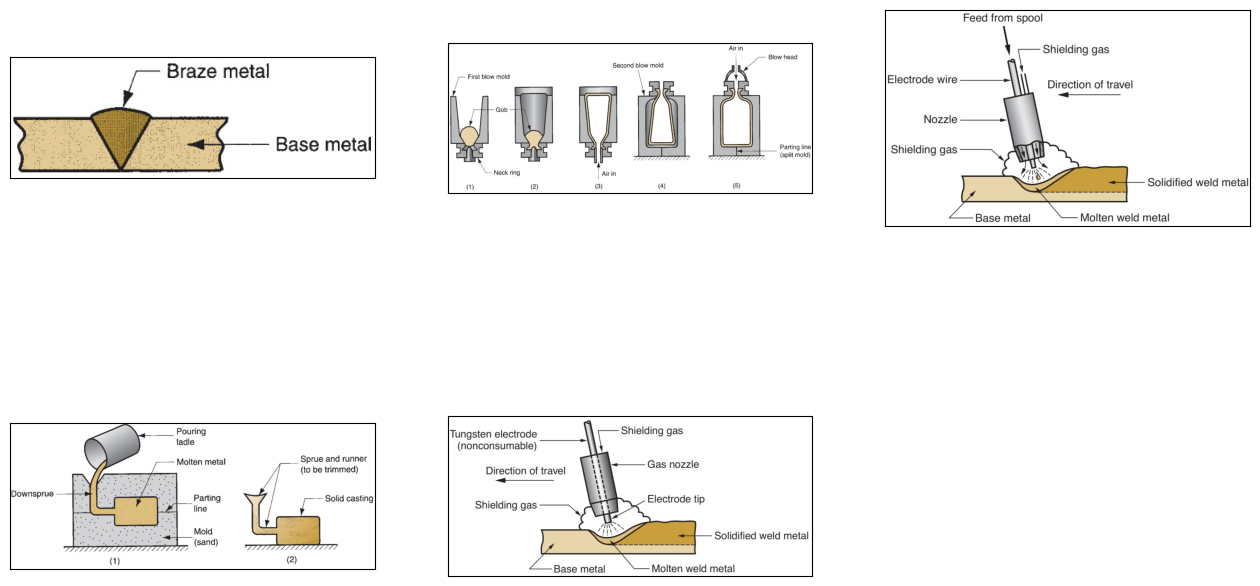

In [10]:
from llama_index.core.response.notebook_utils import display_source_node
from llama_index.core.schema import ImageNode

retrieved_image = []
for res_node in retrieval_results:
    if isinstance(res_node.node, ImageNode):
        retrieved_image.append(res_node.node.metadata["file_path"])
    else:
        display_source_node(res_node, source_length=8000)
        print("----"*10)

plot_images(retrieved_image)

**Node ID:** 52d1c311-b148-4e75-9f9e-f4d855fb33bf<br>**Similarity:** 0.8226332397602492<br>**Text:** # Brazing, Soldering,  Brazing, Soldering,  and Adhesive  and Adhesive  Bonding Bonding  

# 30 30  

This chapter covers three joining processes that are  similar to welding in certain respects: brazing, soldering,  and adhesive bonding. Brazing and soldering both use  ﬁ  ller metals to join and bond two (or more) metal parts  to provide a permanent joint. It is difﬁ  cult, although not  impossible, to disassemble the parts after a brazed or  soldered joint has been made. In the spectrum of join- ing processes, brazing and soldering lie between fusion  welding and solid-state welding. A ﬁ  ller metal is added  in brazing and soldering as in most fusion-welding  operations; however, no melting of the base metals  occurs, which is similar to solid-state welding. Despite  these anomalies, brazing and soldering are generally  considered to be distinct from welding. Brazing and  soldering are attractive compared to welding under cir- cumstances where (1) the metals have poor weldability,  (2) dissimilar metals are to be joined, (3) the intense  heat of welding may damage the components being  joined, (4) the geometry of the joint does not lend itself  to any of the welding methods, and/or (5) high strength  is not a requirement.  

# Chapter Contents  

# 30.1 Brazing  

30.1.1 Brazed Joints

 30.1.2 Filler Metals and Fluxes

 30.1.3 Brazing Methods  

# 30.2 Soldering  

30.2.1 Joint Designs in Soldering

 30.2.2 Solders and Fluxes

 30.2.3 Soldering Methods  

# 30.3 Adhesive Bonding  

30.3.1 Joint Design

 30.3.2 Adhesive Types

 30.3.3   Adhesive Application  Technology Adhesive bonding shares certain features in com- mon with brazing and soldering. It utilizes the forces  of attachment between a ﬁ  ller material and two closely  spaced surfaces to bond the parts. The differences are  that the ﬁ  ller material in adhesive bonding is not metal- lic, and the joining process is carried out at room tem- perature or only modestly above.  

#  Brazing  

Brazing is a joining process in which a ﬁ  ller metal is  melted and distributed by capillary action between  the faying surfaces of the metal parts being joined. No  melting of the base metals occurs in brazing; only the  ﬁ  ller melts. In brazing the ﬁ  ller metal (also called the  brazing metal ), has a melting temperature (liquidus) that is above  $450^{\circ}\mathrm{C}$ $(840^{\circ}\mathrm{F})$   but below the melting point (solidus) of the base metal(s) to be joined. If the joint  is properly designed and the brazing operation has been properly performed, the  brazed joint will be stronger than the ﬁ  ller metal out of which it has been formed  upon solidiﬁ  cation. This rather remarkable result is due to the small part clearances  used in brazing, the metallurgical bonding that occurs between base and ﬁ  ller met- als, and the geometric constrictions that are imposed on the joint by the base parts.  

Brazing has several advantages compared to welding: (1) any metals can be  joined, including dissimilar metals; (2) certain brazing methods can be performed  quickly and consistently, thus permitting high cycle rates and automated production;  (3) some methods allow multiple joints to be brazed simultaneously; (4) brazing can  be applied to join thin-walled parts that cannot be welded; (5) in general, less heat  and power are required than in fusion welding; (6) problems with the heat-affected  zone in the base metal near the joint are reduced; and (7) joint areas that are inac- cessible by many welding processes can be brazed, since capillary action draws the  molten ﬁ  ller metal into the joint.<br>

----------------------------------------


**Node ID:** a371c575-5f13-4a32-90f4-aef4f6e46b5c<br>**Similarity:** 0.817193381271947<br>**Text:** Braze Welding   This process differs from the other brazing processes in the type  of joint to which it is applied. As pictured in Figure 30.6, braze welding is used for  ﬁ  lling a more conventional weld joint, such as the V-joint shown. A greater quantity  of ﬁ  ller metal is deposited than in brazing, and no capillary action occurs. In braze  welding, the joint consists entirely of ﬁ  ller metal; the base metal does not melt and  is therefore not fused into the joint as in a conventional fusion welding process. The  principal application of braze welding is repair work.  

![](images/29056bfa045a19893c48ed239d9e277a4ea57c3cb0c85031688d8679b234e858.jpg)  
FIGURE 30.6  Braze welding. The joint consists  of braze (ﬁ  ller) metal; no base metal is fused in  the joint.  

#  Soldering  

Soldering is similar to brazing and can be deﬁ  ned as a joining process in which a ﬁ  ller  metal with melting point (liquidus) not exceeding $450^{\circ}\mathrm{C}$   $(840^{\circ}\mathrm{F})$  is melted and distrib- uted by capillary action between the faying surfaces of the metal parts being joined. As  in brazing, no melting of the base metals occurs, but the ﬁ  ller metal wets and combines  with the base metal to form a metallurgical bond. Details of soldering are similar to  those of brazing, and many of the heating methods are the same. Surfaces to be sol- dered must be precleaned so they are free of oxides, oils, and so on. An appropriate ﬂ  ux  must be applied to the faying surfaces, and the surfaces are heated. Filler metal, called  solder , is added to the joint, which distributes itself between the closely ﬁ  tting parts.  

In some applications, the solder is precoated onto one or both of the surfaces—a  process called  tinning , irrespective of whether the solder contains any tin. Typical  clearances in soldering range from 0.075 to  $0.125\;\mathrm{mm}$  (0.003–0.005 in), except when  the surfaces are tinned, in which case a clearance of about  $0.025~\mathrm{mm}$ (0.001 in) is  used. After solidiﬁ  cation, the ﬂ  ux residue must be removed.  

As an industrial process, soldering is most closely associated with electron- ics assembly (Chapter 34). It is also used for mechanical joints, but not for joints  subjected to elevated stresses or temperatures. Advantages attributed to soldering  include (1) low energy input relative to brazing and fusion welding, (2) variety of  heating methods available, (3) good electrical and thermal conductivity in the joint,  (4) capability to make air-tight and liquid-tight seams for containers, and (5) easy to  repair and rework.  

The biggest disadvantages of soldering are (1) low joint strength unless reinforced  by mechanical means and (2) possible weakening or melting of the joint in elevated  temperature service.  

# 30.2.1  JOINT DESIGNS IN SOLDERING  

As in brazing, soldered joints are limited to lap and butt types, although butt joints  should not be used in load-bearing applications. Some of the brazing adaptations of  these joints also apply to soldering, and soldering technology has added a few more  variations of its own to deal with the special part geometries that occur in electri- cal connections. In soldered mechanical joints of sheet-metal parts, the edges of the  sheets are often bent over and interlocked before soldering, as shown in Figure 30.7,  to increase joint strength.  

For electronics applications, the principal function of the soldered joint is to provide  an electrically conductive path between two parts being joined. Other design consid- erations in these types of soldered joints include heat generation (from the electrical  resistance of the joint) and vibration. Mechanical strength in a soldered electrical con- nection is often achieved by deforming one or both of the metal parts to accomplish  a mechanical joint between them, or by making the surface area larger to provide  maximum support by the solder.<br>

----------------------------------------


**Node ID:** abadaf71-47b1-44d1-aad7-0e9c400da465<br>**Similarity:** 0.8168450757142727<br>**Text:** In soldered mechanical joints of sheet-metal parts, the edges of the  sheets are often bent over and interlocked before soldering, as shown in Figure 30.7,  to increase joint strength.  

For electronics applications, the principal function of the soldered joint is to provide  an electrically conductive path between two parts being joined. Other design consid- erations in these types of soldered joints include heat generation (from the electrical  resistance of the joint) and vibration. Mechanical strength in a soldered electrical con- nection is often achieved by deforming one or both of the metal parts to accomplish  a mechanical joint between them, or by making the surface area larger to provide  maximum support by the solder. Several possibilities are sketched in Figure 30.8.  

# 30.2.2  SOLDERS AND FLUXES  

Solders and ﬂ  uxes are the materials used in soldering. Both are critically important  in the joining process.  

![](images/db0fc016793fd250d354e55f28c0ff755a7562ddb01d784f7ce84dafc8471cff.jpg)  
FIGURE 30.7  Mechanical interlock- ing in soldered joints for  increased strength:  (a) ﬂ  at lock seam;  (b) bolted or riveted  joint; (c) copper pipe  ﬁ  ttings—lap cylindrical  joint; and (d) crimping  (forming) of cylindrical  lap joint.  

Solders  Most solders are alloys of tin and lead, since both metals have low melting  points (see Figure 6.3). Their alloys possess a range of liquidus and solidus tempera- tures to achieve good control of the soldering process for a variety of applications.  Lead is poisonous and its percentage is minimized in most solder compositions.  Tin is chemically active at soldering temperatures and promotes the wetting action  required for successful joining. In soldering copper, common in electrical connec- tions, intermetallic compounds of copper and tin are formed that strengthen the  bond. Silver and antimony are also sometimes used in soldering alloys. Table 30.2  lists various solder alloy compositions, indicating their approximate soldering tem- peratures and principal applications. Lead-free solders are becoming increasingly  important as legislation to eliminate lead from solders is enacted.  

Soldering Fluxes   Soldering ﬂ  uxes should do the following: (1) be molten at sol- dering temperatures, (2) remove oxide ﬁ  lms and tarnish from the base part surfaces,  (3) prevent oxidation during heating, (4) promote wetting of the faying surfaces,  

![](images/c4b8d9f513e61a5ae1fc9bd5922cbea11850247f3f566ccdaab752f409e6d738.jpg)  
FIGURE 30.8  Tech- niques for securing the  joint by mechanical  means prior to soldering  in electrical connections:  (a) crimped lead wire  on printed circuit board  (PCB); (b) plated through  hole on PCB to maximize  solder contact surface;  (c) hooked wire on ﬂ  at  terminal; and (d) twisted  wires.  

TABLE  •  30.2  Some common solder alloy compositions with their melting temperatures and applications. 
![](images/5cd403b78ee826e7535ad8625f971bb15af52b4a4600c98c63078a3ada1cc3cb.jpg)  
Compiled from [2], [3], [4], and [13]. Eutectic composition—lowest melting point of tin–lead compositions.  

(5) be readily displaced by the molten solder during the process, and (6) leave a resi- due that is noncorrosive and nonconductive. Unfortunately, there is no single ﬂ  ux  that serves all of these functions perfectly for all combinations of solder and base  metals. The ﬂ  ux formulation must be selected for a given application.  

Soldering ﬂ  uxes can be classiﬁ  ed as organic or inorganic.  Organic ﬂ  uxes  are made  of either rosin (i.e., natural rosin such as gum wood, which is not water-soluble) or  water-soluble ingredients (e.g., alcohols, organic acids, and halogenated salts).<br>

----------------------------------------


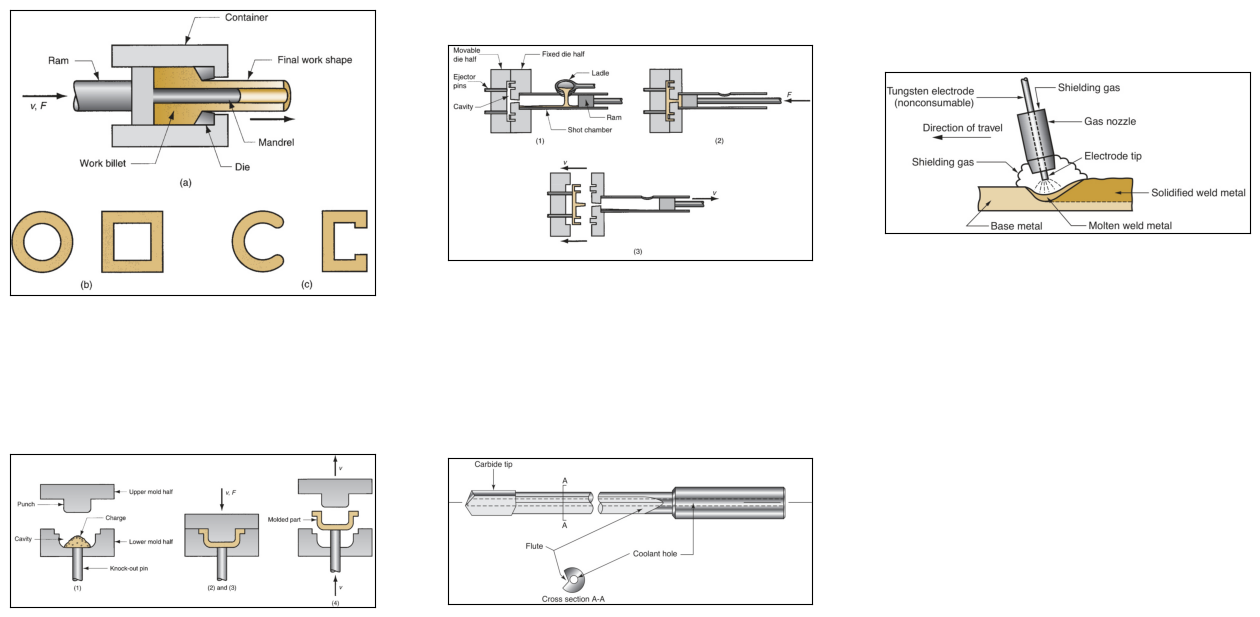

In [12]:
test_query = "A soldering gun is capable of injecting molten solder metal into the joint area: (a) true, or (b) false."
# generate  retrieval results
retriever = index.as_retriever(similarity_top_k=3, image_similarity_top_k=5)
retrieval_results = retriever.retrieve(test_query)

retrieved_image = []
for res_node in retrieval_results:
    if isinstance(res_node.node, ImageNode):
        retrieved_image.append(res_node.node.metadata["file_path"])
    else:
        display_source_node(res_node, source_length=8000)
        print("----"*10)

plot_images(retrieved_image)

**Node ID:** f26e92a1-b5b5-45ac-9f85-0ee978470b5e<br>**Similarity:** 0.8617441071757059<br>**Text:** In addition, the joint must be designed to exploit the particular  strengths of adhesive bonding and avoid its limitations.  

# 30.3.1  JOINT DESIGN  

Adhesive joints are not generally as strong as those by welding, brazing, or solder- ing. Accordingly, consideration must be given to the design of joints that are adhe- sively bonded. The following design principles are applicable: (1) Joint contact area  should be maximized. (2) Adhesive joints are strongest in shear and tension as in  Figure 30.10(a) and (b), and joints should be designed so that the applied stresses  are of these types. (3) Adhesive bonded joints are weakest in cleavage or peeling as  in Figure 30.10(c) and (d), and adhesive bonded joints should be designed to avoid  these types of stresses.  

Typical joint designs for adhesive bonding that illustrate these design principles  are presented in Figure 30.11. Some joint designs combine adhesive bonding with  other joining methods to increase strength and/or provide sealing between the two  components. Some of the possibilities are shown in Figure 30.12. For example, the  combination of adhesive bonding and spot welding is called  weldbonding .  

![](images/87da55401deee2b0c207b53858e19154e609cd7e60f29bc5d433ec339f6cd7d8.jpg)  
FIGURE 30.10  Types of stresses that must be considered in adhesive bonded joints: (a) tension, (b) shear, (c) cleavage,  and (d) peeling.  

![](images/9788393f5c4e9e1eaa0ea03befff42bbb7366c00fcde4516c497d28b1c4e9442.jpg)  
FIGURE 30.11  Some joint designs for adhesive bonding: (a) through (d) butt joints; (e) and (f) T-joints; and (g) through  (j) corner joints.  

![](images/9786dbb422a25eb92ac37ae329d75ca2a4136b5d8e55503c8c225c004f03254b.jpg)  
FIGURE 30.12  Adhesive bonding combined with other joining methods: (a) weldbonding—spot welded and adhesive  bonded; (b) riveted (or bolted) and adhesive bonded; and (c) formed plus adhesive bonded.  

In addition to the mechanical conﬁ  guration of the joint, the application must be  selected so that the physical and chemical properties of adhesive and adherends are  compatible under the service conditions to which the assembly will be subjected.  Adherend materials include metals, ceramics, glass, plastics, wood, rubber, leather,  cloth, paper, and cardboard. Note that the list includes materials that are rigid and  ﬂ  exible, porous and nonporous, metallic and nonmetallic, and that similar or dissimi- lar substances can be bonded together.  

# 30.3.2  ADHESIVE TYPES  

A large number of commercial adhesives are available. They can be classiﬁ  ed into  three categories: (1) natural, (2) inorganic, and (3) synthetic.  

Natural adhesives  are derived from natural sources (e.g., plants and animals),  including gums, starch, dextrin, soy ﬂ  our, and collagen. This category of adhesive is  generally limited to low-stress applications, such as cardboard cartons, furniture, and  bookbinding; or where large surface areas are involved (e.g., plywood).  Inorganic  adhesives  are based principally on sodium silicate and magnesium oxychloride.  Although relatively low in cost, they are also low in strength—a serious limitation in  a structural adhesive.  

TABLE  •  30.3  Important synthetic adhesives. 
![](images/91287c58062afaeea2f39c89df9b91a6c46d2f8107e6f5402056de3489c60705.jpg)  
Compiled from [8], [10], and [14].  

Synthetic adhesives  constitute the most important category in manufacturing.  They include a variety of thermoplastic and thermosetting polymers, many of which  are listed and brieﬂ  y described in Table 30.3.<br>

----------------------------------------


**Node ID:** a7cd9b74-1a9f-4ae2-83e5-b46eab16bc06<br>**Similarity:** 0.8155191923006793<br>**Text:** Bitumen, an asphalt adhesive, was used in an- cient times as a cement and mortar for construction  in Asia Minor. The Romans used pine wood tar and  beeswax to caulk their ships. Glues derived from ﬁ  sh,  stag horns, and cheese were used in the early centu- ries after Christ for assembling components of wood. In more modern times, adhesives have become  an important joining process. Plywood, which relies  on the use of adhesives to bond multiple layers of  wood, was developed around 1900. Phenol formal- dehyde was the ﬁ  rst synthetic adhesive developed,  around 1910, and its primary use was in bonding of  wood products such as plywood. During World War II,  phenolic resins were developed for adhesive bonding  of certain aircraft components. In the 1950s, epoxies  were ﬁ  rst formulated. And since the 1950s a variety  of additional adhesives have been developed, includ- ing anaerobics, various new polymers, and second- generation acrylics.  

Adhesive bonding  is a joining process in which a ﬁ  ller material is used to hold two  (or more) closely spaced parts together by surface attachment. The ﬁ  ller material  that binds the parts together is the  adhesive . It is a nonmetallic substance—usually  a polymer. The parts being joined are called  adherends . Adhesives of greatest inter- est in engineering are  structural adhesives , which are capable of forming strong,  permanent joints between strong, rigid adherends. A large number of commercially  available adhesives are cured by various mechanisms and suited to the bonding  of various materials.  Curing  refers to the process by which the adhesive’s physical  properties are changed from a liquid to a solid, usually by chemical reaction, to  accomplish the surface attachment of the parts. The chemical reaction may involve  polymerization, condensation, or vulcanization. Curing is often motivated by heat  and/or a catalyst, and pressure is sometimes applied between the two parts to acti- vate the bonding process. If heat is required, the curing temperatures are relatively  low, and so the materials being joined are usually unaffected—an advantage for  adhesive bonding. The curing or hardening of the adhesive takes time, called  curing  time  or  setting time . In some cases this time is signiﬁ  cant—generally a disadvantage  in manufacturing.  

Joint strength in adhesive bonding is determined by the strength of the adhesive  itself and the strength of attachment between adhesive and each of the adherends.  One of the criteria often used to deﬁ  ne a satisfactory adhesive joint is that if a failure  should occur due to excessive stresses, it occurs in one of the adherends rather than  at an interface or within the adhesive itself. The strength of the attachment results  from several mechanisms, all depending on the particular adhesive and adherends:  (1) chemical bonding, in which the adhesive unites with the adherends and forms a  primary chemical bond upon hardening; (2) physical interactions, in which secondary  bonding forces result between the atoms of the opposing surfaces; and (3) mechani- cal interlocking, in which the surface roughness of the adherend causes the hardened  adhesive to become entangled or trapped in its microscopic surface asperities.  

For these adhesion mechanisms to operate with best results, the following condi- tions must prevail: (1) surfaces of the adherend must be clean—free of dirt, oil, and  oxide ﬁ  lms that would interfere with achieving intimate contact between adhesive  and adherend; special preparation of the surfaces is often required; (2) the adhesive  in its initial liquid form must achieve thorough wetting of the adherend surface; and  (3) it is usually helpful for the surfaces to be other than perfectly smooth—a slightly  roughened surface increases the effective contact area and promotes mechani- cal interlocking. In addition, the joint must be designed to exploit the particular  strengths of adhesive bonding and avoid its limitations.  

# 30.3.1  JOINT DESIGN  

Adhesive joints are not generally as strong as those by welding, brazing, or solder- ing. Accordingly, consideration must be given to the design of joints that are adhe- sively bonded. The following design principles are applicable: (1) Joint contact area  should be maximized.<br>

----------------------------------------


**Node ID:** ddd6a88f-013a-4a89-abd2-3add3b008c4a<br>**Similarity:** 0.8022100865826698<br>**Text:** [](images/4fa9287e7e474f4387d790a053742a087536a2b5fe6d46af83a3ed15bed0f89e.jpg)  
FIGURE 3.10  Bending of a rectangular cross section results in both tensile and compressive stresses in the  material: (1) initial loading; (2) highly stressed and strained specimen; and (3) bent part.  

load. These materials do not respond well to traditional tensile testing because of  problems in preparing the test specimens and possible misalignment of the press  jaws that hold the specimen. The  bending test  (also known as the  ﬂ  exure test ) is  used to test the strength of these materials, using a setup illustrated in the ﬁ  rst  diagram in Figure 3.10. In this procedure, a specimen of rectangular cross section  is positioned between two supports, and a load is applied at its center. In this con- ﬁ  guration, the test is called a three-point bending test. A four-point conﬁ  guration  is also sometimes used. These brittle materials do not ﬂ  ex to the exaggerated ex- tent shown in Figure 3.10; instead they deform elastically until immediately be- fore fracture. Failure usually occurs because the ultimate tensile strength of the  outer ﬁ  bers of the specimen has been exceeded. This results in  cleavage , a failure  mode associated with ceramics and metals operating at low service temperatures,  in which separation rather than slip occurs along certain crystallographic planes.  The strength value derived from this test is called the  transverse rupture strength ,  calculated from the formula  

$$
T R S={\frac{1.5F L}{b t^{2}}}
$$  

where  $T R S=$  transverse rupture strength, MPa  $\mathrm{(lb/in^{2})}$ ); $F=$  applied load at fracture,  N (lb); $L=$ length of the specimen between supports, mm (in); and  $b$  and  $t$  are the  dimensions of the cross section of the specimen as shown in the ﬁ  gure, mm (in).  

The ﬂ  exure test is also used for certain nonbrittle materials such as thermoplastic  polymers. In this case, because the material is likely to deform rather than fracture,  TRS cannot be determined based on failure of the specimen. Instead, either of two  measures is used: (1) the load recorded at a given level of deﬂ  ection, or (2) the de- ﬂ  ection observed at a given load.  

# 3.1.4 SHEAR PROPERTIES  

Shear involves application of stresses in opposite directions on either side of a thin  element to deﬂ  ect it as shown in Figure 3.11. The shear stress is deﬁ  ned as  

$$
\tau={\frac{F}{A}}
$$  

![](images/54903b7bc86140704dc9a1b301a1623b6698845dbec06069b59ac3b86084a573.jpg)  

where  $\tau=$  shear stress,  $\mathrm{lb/in^{2}}$  (MPa);  $F=$  applied force,  $\mathbf{N}$  (lb); and  $A=$  area over  which the force is applied, $\mathrm{in}^{2}\left(\mathrm{mm}^{2}\right)$ . Shear strain can be deﬁ  ned as  

$$
\gamma=\frac{\delta}{b}
$$  

where  $\gamma=$  shear strain, $\mathrm{mm/mm}\;(\mathrm{in/in});\delta=$ the deﬂ  ection of the element, mm (in);  and $b=$  the orthogonal distance over which deﬂ  ection occurs, mm (in).  

Shear stress and strain are commonly tested in a  torsion test , in which a thin- walled tubular specimen is subjected to a torque as shown in Figure 3.12. As torque  is increased, the tube deﬂ  ects by twisting, which is a shear strain for this geometry.<br>

----------------------------------------


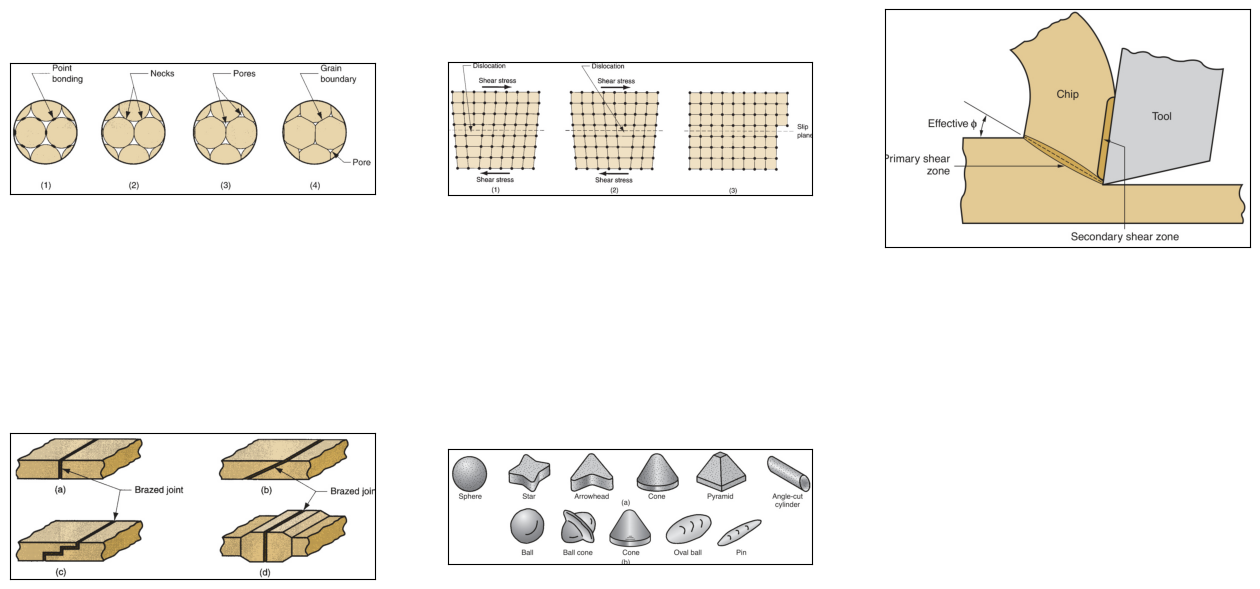

In [14]:
test_query = "Adhesively bonded joints are strongest under which type of stresses (pick two best answers): (a) cleavage, (b) peeling, (c) shear, and (d) tension."
# generate  retrieval results
retriever = index.as_retriever(similarity_top_k=3, image_similarity_top_k=5)
retrieval_results = retriever.retrieve(test_query)

retrieved_image = []
for res_node in retrieval_results:
    if isinstance(res_node.node, ImageNode):
        retrieved_image.append(res_node.node.metadata["file_path"])
    else:
        display_source_node(res_node, source_length=8000)
        print("----"*10)

plot_images(retrieved_image)

In [15]:
retrieval_results

[NodeWithScore(node=TextNode(id_='f26e92a1-b5b5-45ac-9f85-0ee978470b5e', embedding=None, metadata={'file_path': '/home/zihan/Desktop/Manufacturing_QA/BookData/FullBook_HighQuality/sec30.txt', 'file_name': 'sec30.txt', 'file_type': 'text/plain', 'file_size': 41401, 'creation_date': '2024-08-24', 'last_modified_date': '2024-08-24'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='82d5254a-6ae3-4f58-b47b-358d9e4a4662', node_type=<ObjectType.DOCUMENT: '4'>, metadata={'file_path': '/home/zihan/Desktop/Manufacturing_QA/BookData/FullBook_HighQuality/sec30.txt', 'file_name': 'sec30.txt', 'file_type': 'text/plain', 'file_size': 41401, 'creation_date': '2024-08-24', 'last_modified_date': '2024-08-24'}, hash='37857da5

In [10]:
test_query = """Clearances between surfaces in brazing are which one of the following: (a) 0.0025 to 0.025 mm (0.0001 to 0.001 in.), (b) 0.025 to 0.250 mm (0.001 to 0.010 in.), (c) 0.250 to 2.50 mm (0.010 to 0.100 in.), or (d) 2.5 to 5.0 mm (0.10 to 0.20 in.)."""
# generate  retrieval results
retriever = index.as_retriever(similarity_top_k=3, image_similarity_top_k=3)
try:
    retrieval_results = retriever.retrieve(test_query)

    retrieved_image = []
    for res_node in retrieval_results:
        if isinstance(res_node.node, ImageNode):
            retrieved_image.append(res_node.node.metadata["file_path"])
        else:
            display_source_node(res_node, source_length=200)

    plot_images(retrieved_image)
except RuntimeError as e:
    # Check if the error message indicates that the input context is too long
    if 'too long for context length' in str(e):
        print("No output, likely because the input context is too long")
    else:
        # If it's a different RuntimeError, raise it
        raise e


No output, likely because the input context is too long


In [11]:
retrieved_image = []
retrieved_text = []
for res_node in retrieval_results:
    if isinstance(res_node.node, ImageNode):
        retrieved_image.append(res_node.node.metadata["file_path"])
    else:
        retrieved_text.append(res_node.node.text)
        display_source_node(res_node, source_length=200)

**Node ID:** f26e92a1-b5b5-45ac-9f85-0ee978470b5e<br>**Similarity:** 0.861744118549674<br>**Text:** In addition, the joint must be designed to exploit the particular  strengths of adhesive bonding and avoid its limitations.  

# 30.3.1  JOINT DESIGN  

Adhesive joints are not generally as strong ...<br>

**Node ID:** a7cd9b74-1a9f-4ae2-83e5-b46eab16bc06<br>**Similarity:** 0.8155191694622783<br>**Text:** Bitumen, an asphalt adhesive, was used in an- cient times as a cement and mortar for construction  in Asia Minor. The Romans used pine wood tar and  beeswax to caulk their ships. Glues derived from...<br>

**Node ID:** ddd6a88f-013a-4a89-abd2-3add3b008c4a<br>**Similarity:** 0.8022100780875864<br>**Text:** [](images/4fa9287e7e474f4387d790a053742a087536a2b5fe6d46af83a3ed15bed0f89e.jpg)  
FIGURE 3.10  Bending of a rectangular cross section results in both tensile and compressive stresses in the  materi...<br>

Explanation: At 1095°C (2000°F) and 1% Fe3C, the iron-iron carbide phase diagram shows that the phase present is a mixture of austenite (γ) and cementite (Fe3C).

YourChoice: C


**Node ID:** 65e861d1-029a-4ca3-b02b-96b0cf28173d<br>**Similarity:** 0.84491055349708<br>**Text:** The  composition of the alloy is often such that the intermediate phase is mixed with the  primary solid solution to form a two-phase structure, one phase dispersed throughout  the second. These two-phase alloys are important because they can be formulated  and heat-treated for significantly higher strength than solid solutions.  

# 6.1.2  PHASE  DIAGRAMS  

As the term is used in this text, a phase diagram is a graphical means of represent-  ing the phases of a metal alloy system as a function of composition and temperature.  Discussion of the diagram will be limited to alloy systems consisting of two elements  at atmospheric pressures. This type of diagram is called a  binary phase diagram Other forms of phase diagrams are discussed in texts on materials science, such as [6].  

The Copper–Nickel Alloy System  The best way to introduce the phase dia-  gram is by example. Figure 6.2 presents one of the simplest cases, the $\mathrm{Cu{-}N i}$  alloy  system. Composition is plotted on the horizontal axis and temperature on the verti-  cal axis. Thus, any point in the diagram indicates the overall composition and the  phase or phases present at the given temperature. Pure copper melts at  $1083^{\circ}\mathrm{C}$ $(1981^{\circ}\mathrm{F})$ , and pure nickel at  $1455^{\circ}\mathrm{C}$   $(2651^{\circ}\mathrm{F})$ . Alloy compositions between these  extremes exhibit gradual melting that commences at the solidus and concludes at  the liquidus as temperature is increased.  

The copper–nickel system is a solid solution alloy throughout its entire range  of compositions. Anywhere in the region below the solidus line, the alloy is a solid  

![](images/caadb9b77bab2a15e9b49b790d299fa59a1a642e5fa4553826c33a07dd6d7cf7.jpg)  
FIGURE 6.2   Phase diagram for the  copper–nickel alloy  system.  

solution; there are no intermediate solid phases in this system. However, there is a  mixture of phases in the region bounded by the solidus and liquidus. Recall from  Section 4.1.3 that the solidus is the temperature at which the solid metal begins to  melt as temperature is increased, and the liquidus is the temperature at which  melting is completed. It can now be seen in the phase diagram that these tem-  peratures vary with composition. Between the solidus and liquidus, the metal is a  solid–liquid mix.  

Determining Chemical Compositions of Phases  Although the overall  composition of the alloy is given by its position along the horizontal axis, the com-  positions of the liquid and solid phases are not the same. It is possible to determine  these compositions from the phase diagram by drawing a horizontal line at the tem-  perature of interest. The points of intersection between the horizontal line and the  solidus and liquidus indicate the compositions of the solid and liquid phases present,  respectively. Simply construct the vertical projections from the intersection points to  the $x$ -axis and read the corresponding compositions.  

Example 6.1  Determining  compositions  from the phase  diagram  

Analyze the compositions of the liquid and solid phases present in the copper-  nickel system at an aggregate composition of $50\%$  nickel and a temperature of  $1260^{\circ}\mathrm{C}$   $(2300^{\circ}\mathrm{F})$ ).  

Solution:  A horizontal line is drawn at the given temperature level as shown  in Figure 6.2. The line intersects the solidus at a composition of $62\%$  nickel,  thus indicating the composition of the solid phase. The intersection with the  liquidus occurs at a composition of $36\%$  Ni, corresponding to the analysis of  the liquid phase.  

As the temperature of the  $50{-}50\ \mathrm{Cu{-}N i}$  alloy is reduced, the solidus line is reached  at about  $1221^{\circ}\mathrm{C}$   $(2230^{\circ}\mathrm{F})$ ). Applying the same procedure used in the example, the  composition of the solid metal is  $50\%$  nickel, and the composition of the last remain-  ing liquid to freeze is about  $26\%$  nickel.<br>

**Node ID:** 3ba4e956-e91f-4406-8865-f55935120ee0<br>**Similarity:** 0.8367564112621095<br>**Text:** The proportions given by Eqs. (6.1) and (6.2) are by weight, same as the phase  diagram percentages. Note that the proportions are based on the distance on the  opposite side of the phase of interest; hence the name inverse lever rule. One can  see the logic in this by taking the extreme case when, say, $C S=0$ ; at that point, the  proportion of the liquid phase is zero because the solidus has been reached and the  alloy is therefore completely solidified.  

The methods for determining chemical compositions of phases and the amounts of  each phase are applicable to the solid region of the phase diagram as well as the  liquidus–solidus region. Wherever there are regions in the phase diagram in which two  phases are present, these methods can be used. When only one phase is present (in  Figure 6.2, this is the entire solid region), the composition of the phase is its aggregate  composition under equilibrium conditions; and the inverse lever rule does not apply  because there is only one phase.  

The Tin–Lead Alloy System  A more complicated phase diagram is the $\mathrm{Sn-Pb}$   system, shown in Figure 6.3. Tin–lead alloys have traditionally been used as solders  for making electrical and mechanical connections (Section 30.2). The phase dia-  gram exhibits several features not included in the previous $\mathrm{Cu{-}N i}$  system. One fea-  ture is the presence of two solid phases, alpha ( a ) and beta  $(b)$ . The  a  phase is a solid  solution of tin in lead at the left side of the diagram, and the $b$   phase is a solid solu-  tion of lead in tin that occurs only at elevated temperatures around  $200^{\circ}\mathrm{C}$   $(375^{\circ}\mathrm{F})$   at the right side of the diagram. Between these solid solutions lies a mixture of the  two solid phases, $a+b$ .  

Another feature of interest in the tin–lead system is how melting differs for dif-  ferent compositions. Pure tin melts at  $232^{\circ}\mathrm{C}$   $(449^{\circ}\mathrm{F})$ , and pure lead melts at  $327^{\circ}\mathrm{C}$   $(621^{\circ}\mathrm{F})$ ). Alloys of these elements melt at lower temperatures. The diagram shows two  liquidus lines that begin at the melting points of the pure metals and meet at a  composition of  $61.9\%$  Sn. This is the eutectic composition for the tin–lead system. In  general, a  eutectic alloy  is a particular composition in an alloy system for which  the solidus and liquidus are at the same temperature. The correspond- ing  eutectic  temperature , the melting point of the eutectic composition, is  $183^{\circ}\mathrm{C}$   $(362^{\circ}\mathrm{F})$  in the  present case. The eutectic temperature is always the lowest melt- ing point for an  alloy system (eutectic is derived from the Greek word  eutektos , meaning easily  melted).  

![](images/2b073cbb8ef6969cae5ec6ccc19998ffd2ef95b6c8d1729594e41fd7f238a0be.jpg)  
FIGURE 6.3  Phase   diagram for the tin–lead  alloy system.  

# TABLE  •  6.1   Basic data on the metallic elements: (a) iron.  

Symbol:   Fe  Atomic number:   26   Specific gravity:  7.87  Crystal structure:  BCC   Melting temperature:  $1539^{\circ}\mathrm{C}$   $(2802^{\circ}\mathrm{F})$ )   Elastic modulus:  209,000 MPa  $(30\,\mathrm{X}\,10^{6}\,\mathrm{lb}/\mathrm{in}^{2})$ )  Principal ore:  Hematite  $(\mathrm{Fe}_{2}\mathrm{O}_{3})$ )   Alloying elements:  Carbon; also chromium, manganese, nickel, molybdenum, vanadium, and silicon.  Typical applications:  Construction, machinery, automotive, railway tracks and equipment.  

Compiled from [6], [11], [12], and other references.<br>

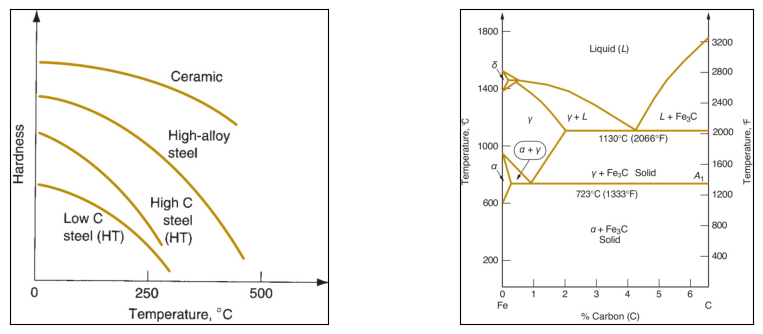

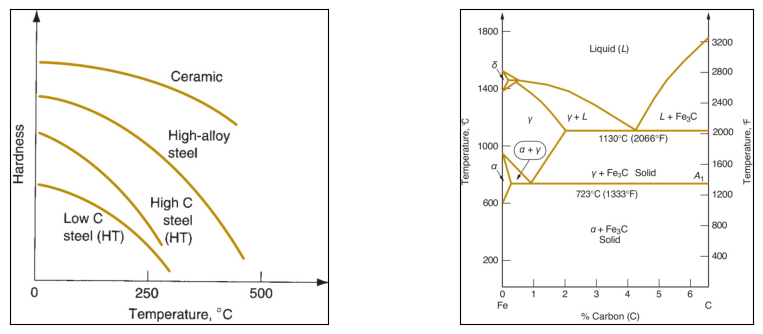

In [27]:
from llama_index.core import PromptTemplate
# from llama_index.core.query_engine import SimpleMultiModalQueryEngines
from llama_index.multi_modal_llms.openai import OpenAIMultiModal

# show sources
from llama_index.core.response.notebook_utils import display_source_node


OPENAI_API_KEY = api_key
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

openai_mm_llm = OpenAIMultiModal(
    model="gpt-4o", api_key=OPENAI_API_KEY, max_new_tokens=4000
)


qa_tmpl_str = (
"""You are an top student in manufacturing major. You are in an exam and you need to answering the following MCQ based on the context provided and what you know regarding manufacturing process and materials correctly. 
Please think step by step then provide the choose the correct answer(s) carefully as yout finnal answer, remember you need to provide the letter choice. for the context choice will result a zero even it is correct:\n

You must provide answer in the following format:

"Explanation": "The capital of France is Paris, which is a major European city and a global center for art, fashion, and culture.", "YourChoice": "A"

{context_str}\n
Answer the following question:
Query: {query_str}\n
Answer: """
)
qa_tmpl = PromptTemplate(qa_tmpl_str)

query_engine = index.as_query_engine(
    llm=openai_mm_llm, text_qa_template=qa_tmpl
)

# test_query = """Clearances between surfaces in brazing are which one of the following: (a) 0.0025 to 0.025 mm (0.0001 to 0.001 in.), (b) 0.025 to 0.250 mm (0.001 to 0.010 in.), (c) 0.250 to 2.50 mm (0.010 to 0.100 in.), or (d) 2.5 to 5.0 mm (0.10 to 0.20 in.)."""
test_query = """In the iron-iron carbide phase diagram of Figure 6.4, identify the phase or phases present at the following temperatures and nominal compositions: (c) 1095°C (2000°F) and 1% \Fe3C"""

try:
    result = query_engine.query(test_query)
    print(result)
    for text_node in result.metadata["text_nodes"]:
        display_source_node(text_node, source_length=8000)
        plot_images(
            [n.metadata["file_path"] for n in result.metadata["image_nodes"]]
        )

except RuntimeError as e:
    # Check if the error message indicates that the input context is too long
    if 'too long for context length' in str(e):
        result = "No output, likely because the input context is too long"
        print(result)
    else:
        # If it's a different RuntimeError, raise it
        raise e

In [40]:
result

Response(response='"Explanation": "Clearances between surfaces in brazing must be carefully controlled to ensure proper flow of the molten filler metal. If the clearance is too small, it restricts the flow, while if it is too large, capillary action is reduced, leading to areas without filler metal. The optimal clearance maximizes joint strength and is typically between 0.025 to 0.25 mm.", "YourChoice": "A"', source_nodes=[NodeWithScore(node=TextNode(id_='b428c198-66ae-420b-809c-59b5d7d8d7fb', embedding=None, metadata={'file_path': '/home/zihan/Desktop/Manufacturing_QA/BookData/all_documents/sec30.txt', 'file_name': 'sec30.txt', 'file_type': 'text/plain', 'file_size': 41401, 'creation_date': '2024-08-24', 'last_modified_date': '2024-08-24'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_acces

In [1]:
import pandas as pd
import glob
import re

# Define the file path pattern to match all CSV files ending with -MCQ.csv
csv_file_pattern = '/home/zihan/Desktop/Manufacturing_QA/QuestionsData/QA_Pairs/*-MCQ.csv'

# Use glob to find all files matching the pattern
csv_files = glob.glob(csv_file_pattern)

# Read all matching CSV files into a list of DataFrames
dfs = [pd.read_csv(file) for file in csv_files]

# Concatenate all DataFrames into one
df = pd.concat(dfs, ignore_index=True)

# Display the combined DataFrame
df

,Question,Answer
0,Reasons why workparts must be cleaned include ...,"Answer. (a), (c), (d), and (e)."
1,Which of the following chemicals is associated...,"Answer. (a), (b)."
2,Shot peening is a mechanical cleaning method u...,Answer. (b) Principal function is to cold work...
3,"In sand blasting, which one of the following a...",Answer. (e)
4,"The abrasive media used in mass finishing, suc...","Answer. (a), (b), (c), (d), and (e)."
...,...,...
457,Steel cutting grades of cemented carbide are t...,Answer. (c) and (d).
458,If you had to select a cemented carbide for an...,Answer. (d)
459,Which of the following processes are used to p...,Answer. (a) and (c).
460,Which of the following materials has the highe...,Answer. (b)


In [56]:
df

,Question,Answer
0,Reasons why workparts must be cleaned include ...,"Answer. (a), (c), (d), and (e)."
1,Which of the following chemicals is associated...,"Answer. (a), (b)."
2,Shot peening is a mechanical cleaning method u...,Answer. (b) Principal function is to cold work...
3,"In sand blasting, which one of the following a...",Answer. (e)
4,"The abrasive media used in mass finishing, suc...","Answer. (a), (b), (c), (d), and (e)."
...,...,...
457,Steel cutting grades of cemented carbide are t...,Answer. (c) and (d).
458,If you had to select a cemented carbide for an...,Answer. (d)
459,Which of the following processes are used to p...,Answer. (a) and (c).
460,Which of the following materials has the highe...,Answer. (b)


In [113]:
questions = df['Question'].tolist()
ground_truth = df['Answer'].tolist()

# Function to split the questions into batches
def split_into_batches(questions, batch_size=100):
    batched_question = [questions[i:i + batch_size] for i in range(0, len(questions), batch_size)]
    batched_ground_truth = [ground_truth[i:i + batch_size] for i in range(0, len(questions), batch_size)]
    return batched_question, batched_ground_truth

# Split the questions into batches of 100
batched_question, batched_ground_truth = split_into_batches(questions, batch_size=100)
len(batched_ground_truth)


5

做了分段处理，每100个存储一次， 以防出问题

In [114]:
output_df = pd.DataFrame()
for i, batch in enumerate(batched_question):
    results = []
    text_reasons = []
    image_reasons = []
    for question in batch:
        try:
            result = query_engine.query(question)
            text_reason = result.metadata["text_nodes"]
            image_reason = result.metadata["image_nodes"]
            match = re.search(r'"Explanation": "(.*?)", "YourChoice": "(.*?)"', result.response)
            if match:
                explanation_part = match.group(1)
                your_choice_part = match.group(2)
                
                # Reconstruct the dictionary
                parsed_dict = {
                    "llamaindex_result": result,
                    "Explanation": explanation_part,
                    "YourChoice": your_choice_part
                }
                results.append(parsed_dict)
            print(result)
            # results.append(result.response) 
            text_reasons.append(text_reason)
            image_reasons.append(image_reason)
        except RuntimeError as e:
            # Check if the error message indicates that the input context is too long
            if 'too long for context length' in str(e):
                text_reason = "No output, likely because the input context is too long"
                image_reason = "No output, likely because the input context is too long"
                result = "No output, likely because the input context is too long"
                explanation_part = "No output, likely because the input context is too long"
                your_choice_part = "NAN"
                
                # Reconstruct the dictionary
                parsed_dict = {
                    "llamaindex_result": result,
                    "Explanation": explanation_part,
                    "YourChoice": your_choice_part
                }
                results.append(parsed_dict)
                text_reasons.append(text_reason)
                image_reasons.append(image_reason)
            else:
                # If it's a different RuntimeError, raise it
                raise e
        

    ground_truth_df = pd.DataFrame(batched_ground_truth[i], columns=['Answer'])
    result_df = pd.DataFrame(results)
    text_reasons_df = pd.DataFrame({'llamaindex_text_reasons': text_reasons})
    images_reasons_df = pd.DataFrame({'llamaindex_images_reasons': image_reasons})
    questions_df = pd.DataFrame({'Question': batch})
    batch_df = pd.concat([questions_df, ground_truth_df, result_df, text_reasons_df, images_reasons_df], axis=1)
    output_df = pd.concat([output_df, batch_df], ignore_index=True)
    csv_file_path = './all_cot_multimodalRAG.csv'
    output_df.to_csv(csv_file_path, index=False)
    
output_df

"Explanation": "Manufactured parts must be cleaned for several reasons, including improving hygiene conditions for workers and customers (c), preparing the surface for subsequent processing (d), and removing contaminants that might chemically attack the surface (e). Better appearance (a) and enhancing mechanical properties of the surface (b) are not explicitly mentioned as primary reasons in the provided context.", "YourChoice": "C, D, E"
"Explanation": "Alkaline cleaning uses chemicals such as sodium hydroxide and borax to remove contaminants from metallic surfaces. Sulfuric acid is associated with acid cleaning, and trichlorethylene is used in solvent cleaning, not alkaline cleaning.", "YourChoice": "A, B"
"Explanation": "Shot peening is primarily used to improve the fatigue strength of metal parts by inducing compressive stresses into the surface layers, rather than for cleaning purposes. Therefore, the statement that shot peening is a mechanical cleaning method used primarily to re

,Question,Answer,llamaindex_result,Explanation,YourChoice,llamaindex_text_reasons,llamaindex_images_reasons
0,Reasons why workparts must be cleaned include ...,"Answer. (a), (c), (d), and (e).","""Explanation"": ""Manufactured parts must be cle...",Manufactured parts must be cleaned for several...,"C, D, E",[Node ID: 151e53a2-314d-4753-9c98-d187a365ba6a...,[Node ID: 5b999d8e-fb4d-42af-ba4d-bcf21c220a81...
1,Which of the following chemicals is associated...,"Answer. (a), (b).","""Explanation"": ""Alkaline cleaning uses chemica...",Alkaline cleaning uses chemicals such as sodiu...,"A, B",[Node ID: 196aa543-7659-4f80-8c95-3e284cf1546f...,[Node ID: 91c8b57a-d512-4f71-bb2b-b46a9c2637cb...
2,Shot peening is a mechanical cleaning method u...,Answer. (b) Principal function is to cold work...,"""Explanation"": ""Shot peening is primarily used...",Shot peening is primarily used to improve the ...,b,[Node ID: 7747657e-659d-41e3-a247-58809592bd1a...,[Node ID: aab83309-4072-46f9-95ae-1bf75ab9408f...
3,"In sand blasting, which one of the following a...",Answer. (e),"""Explanation"": ""In sand blasting, abrasives ar...","In sand blasting, abrasives are used to clean ...",e,[Node ID: 3c80c4d7-a646-40bb-bda1-14c0b698fc7e...,[Node ID: c6a5cf7b-c9d0-4018-a107-63f21ddd12ed...
4,"The abrasive media used in mass finishing, suc...","Answer. (a), (b), (c), (d), and (e).","""Explanation"": ""The abrasive media used in mas...",The abrasive media used in mass finishing proc...,"A, B, D, E",[Node ID: 75db9d70-d453-4af9-a647-f44e7dae295b...,[Node ID: 9a468a8f-484a-4dca-9046-72fc1792dfdd...
...,...,...,...,...,...,...,...
457,Steel cutting grades of cemented carbide are t...,Answer. (c) and (d).,"""Explanation"": ""Steel cutting grades of cement...",Steel cutting grades of cemented carbide typic...,"C, D, E",[Node ID: 93549a64-4f87-4b56-a108-f2404a1ecd31...,[Node ID: d7c8ac9c-9075-46b1-9dfd-23f50df38d8b...
458,If you had to select a cemented carbide for an...,Answer. (d),"""Explanation"": ""For finish turning of steel, t...","For finish turning of steel, the appropriate C...",C,[Node ID: 896eee33-4329-431a-add6-d7c3ba5a76ae...,[Node ID: d7c8ac9c-9075-46b1-9dfd-23f50df38d8b...
459,Which of the following processes are used to p...,Answer. (a) and (c).,"""Explanation"": ""The processes used to provide ...",The processes used to provide thin coatings on...,"A, C",[Node ID: f18f6cc3-cb57-4fb0-8984-7092342a2274...,[Node ID: d7c8ac9c-9075-46b1-9dfd-23f50df38d8b...
460,Which of the following materials has the highe...,Answer. (b),"""Explanation"": ""Based on the provided informat...","Based on the provided information, cubic boron...",B,[Node ID: 54e0f403-a5ec-4d3b-a0b4-7620b43461d7...,[Node ID: d5442044-b38f-42f3-87ad-df8bba843329...


In [105]:
# import re
# import pandas as pd

# # # Example list of strings to parse
# # try_results = [
# #     '"Explanation": "Batch model lines are most suited to medium production situations because they are designed to handle moderate volumes of products with some level of customization. This allows for flexibility in production while maintaining efficiency.", "YourChoice": "C"',
# #     # Add more items as needed
# # ]

# # Parse the results using regex
# parsed_results = []
# for item in results:
#     # Use regex to extract "Explanation" and "YourChoice"
#     match = re.search(r'"Explanation": "(.*?)", "YourChoice": "(.*?)"', item)
#     if match:
#         explanation_part = match.group(1)
#         your_choice_part = match.group(2)
        
#         # Reconstruct the dictionary
#         parsed_dict = {
#             "Explanation_llama": explanation_part,
#             "YourChoice_llama": your_choice_part
#         }
#         parsed_results.append(parsed_dict)

# # Convert the parsed results into a DataFrame
# Outputs_df_2 = pd.DataFrame(parsed_results)

# # Display the DataFrame
# Outputs_df_2


,Explanation_llama,YourChoice_llama
0,Batch model lines are most suited to medium pr...,C
1,Manual methods of workpart transfer are typica...,C
2,Precedence constraints refer to the sequence i...,D
3,A transfer line is a manufacturing system wher...,C
4,A dial indexing machine uses synchronous workp...,D
5,The line efficiency on an automated line can b...,"A, C"
6,"In brazing, the base metals do not melt; inste...",B
7,The strength of a brazed joint is typically we...,C
8,Scarfing in the brazing of a butt joint does n...,B
9,Brazing offers several advantages over other j...,"A, B, C"


In [106]:
# output_df = pd.concat([df, Outputs_df_2, text_reasons_df, images_reasons_df], axis=1)
# output_df

,Question,Answer,Explanation_llama,YourChoice_llama,llamaindex_text_reasons,llamaindex_images_reasons
0,Batch model lines are most suited to which one...,Answer. (c),Batch model lines are most suited to medium pr...,C,Node ID: 222d1852-c8c5-4bdd-86e2-b2e955158707\...,Node ID: 87544150-9c0a-4abf-bb37-a41caa969f9e\...
1,Manual methods of workpart transfer are probab...,Answer. (a),Manual methods of workpart transfer are typica...,C,Node ID: 635a1f0e-0756-4d95-a4ad-37b6b2ce5df6\...,Node ID: e03cc2ca-7454-41a5-9861-eeb6530c58f1\...
2,Precedence constraints are best described by w...,Answer. (d),Precedence constraints refer to the sequence i...,D,Node ID: d51d9d86-284f-4356-afd8-603a6ae214da\...,Node ID: 6f9af665-b713-43ce-b1c0-9043cb2a9798\...
3,Which of the following phrases are most approp...,"Answer. (c), (d), and (f).",A transfer line is a manufacturing system wher...,C,Node ID: 635a1f0e-0756-4d95-a4ad-37b6b2ce5df6\...,Node ID: f0503870-f328-407a-a779-5f31606b1f9b\...
4,The transfer line is most closely associated w...,Answer. (c),A dial indexing machine uses synchronous workp...,D,Node ID: 222d1852-c8c5-4bdd-86e2-b2e955158707\...,Node ID: e03cc2ca-7454-41a5-9861-eeb6530c58f1\...
5,A dial indexing machine uses which one of the ...,Answer. (d),The line efficiency on an automated line can b...,"A, C",Node ID: bf3fc349-a900-4db7-8cc2-1d696cfa8f97\...,Node ID: 73aa8247-bbfa-4d37-aa8c-2c4a7487bc8c\...
6,The line efficiency (proportion uptime) on an ...,Answer. (a) and (c).,"In brazing, the base metals do not melt; inste...",B,Node ID: aa272242-7cd4-4e23-850a-2b63651ff497\...,Node ID: 891d7aa5-b1f3-4d39-a761-6d4eeedede7b\...
7,"In brazing, the base metals melt at temperatur...",Answer. (b) Neither brazing or soldering invol...,The strength of a brazed joint is typically we...,C,Node ID: bbca6680-e84e-4704-a05c-e448e5e04bf5\...,Node ID: f0503870-f328-407a-a779-5f31606b1f9b\...
8,The strength of a brazed joint is typically wh...,Answer. (b),Scarfing in the brazing of a butt joint does n...,B,Node ID: bbca6680-e84e-4704-a05c-e448e5e04bf5\...,Node ID: e03cc2ca-7454-41a5-9861-eeb6530c58f1\...
9,Scarfing in the brazing of a butt joint involv...,Answer. (b) Scarfing involves a preparation of...,Brazing offers several advantages over other j...,"A, B, C",Node ID: cbe6efa8-7d16-46ab-a79c-b518882e15a8\...,Node ID: e03cc2ca-7454-41a5-9861-eeb6530c58f1\...


In [107]:
# csv_file_path = 'Test32_40.csv'
# df.to_csv(csv_file_path, index=False)